# Предобработка датасета

## Обзор данных

In [2]:
import pandas as pd
import numpy as np
import ast

In [3]:
df = pd.read_csv('games.csv')

In [4]:
df.sample()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1144,1144,Lil Gator Game,"Dec 14, 2022","['Playtonic Friends', 'Scott Slucher']",4.1,137,137,"['Adventure', 'Indie', 'Platform']",The world is big when you’re a lil gator... Go...,"[""Growing up sucks, but unfortunately it is in...",247,22,167,314


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


## Пропуски

In [6]:
df.isna().sum()

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [7]:
df[df['Rating'].isna()==1].T

,587,649,713,719,726,746,972,1130,1160,1202,1305,1341,1349
Unnamed: 0,587,649,713,719,726,746,972,1130,1160,1202,1305,1341,1349
Title,Final Fantasy XVI,Death Stranding 2,Final Fantasy VII Rebirth,Lies of P,Judas,Like a Dragon Gaiden: The Man Who Erased His Name,The Legend of Zelda: Tears of the Kingdom,Star Wars Jedi: Survivor,We Love Katamari Reroll + Royal Reverie,Earthblade,Diablo IV,Pac-Man in a Tin,Pokémon Añil
Release Date,"Jun 22, 2023",releases on TBD,"Dec 31, 2023","Aug 01, 2023","Mar 31, 2025","Dec 31, 2023","May 12, 2023","Apr 28, 2023","Jun 02, 2023","Dec 31, 2024","Jun 06, 2023","Mar 22, 2023","Mar 23, 2023"
Team,"['Square Enix', 'Square Enix Creative Business...",['Kojima Productions'],['Square Enix'],"['NEOWIZ', 'Round8 Studio']",['Ghost Story Games'],"['Ryū Ga Gotoku Studios', 'Sega']","['Nintendo', 'Nintendo EPD Production Group No...","['Respawn Entertainment', 'Electronic Arts']","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",['Extremely OK Games'],['Blizzard Entertainment'],['Fizz Creations'],['Eric Lost']
Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Times Listed,422,105,192,175,90,118,581,250,51,83,148,0,2
Number of Reviews,422,105,192,175,90,118,581,250,51,83,148,0,2
Genres,['RPG'],"['Adventure', 'Shooter']",[],['RPG'],"['Adventure', 'Shooter']","['Adventure', 'Brawler', 'RPG']","['Adventure', 'RPG']",['Adventure'],"['Adventure', 'Puzzle']","['Adventure', 'Indie', 'RPG']","['Brawler', 'RPG']",['Arcade'],['RPG']
Summary,Final Fantasy XVI is an upcoming action role-p...,NaN,This next standalone chapter in the FINAL FANT...,"Inspired by the familiar story of Pinocchio, L...",A disintegrating starship. A desperate escape ...,This game covers Kiryu's story between Yakuza ...,The Legend of Zelda: Tears of the Kingdom is t...,The story of Cal Kestis continues in Star Wars...,We Love Katamari Reroll + Royal Reverie is a r...,"You are Névoa, an enigmatic child of Fate retu...",Endless demons to slaughter. Deep customizatio...,Pac-Man in a Tin is a pocket-sized tin contain...,Pokémon Añil is the fourth video game created ...
Reviews,[],[],[],[],[],[],[],[],[],[],[],[],"['pokemon HWHAT', 'Finally, after all these ye..."


Есть игры, которые ещё только будут выходить в этом и следующем годах, поэтому их рейтинг пока неизвестен. Заменю пропуск на -1.

In [8]:
df[df['Team'].isna()==1]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1245,1245,NEET Girl Date Night,"Oct 21, 2022",NaN,2.7,21,21,['Visual Novel'],Your friend sets you up on a date with his NEE...,"['this sucked. ""Omg she is literally me"" is no...",106,1,44,42


Как подсказывает гугл разработчик этой игры - Hitsuji Goods. Поэтому внесём это в наши данные

In [9]:
df.loc[df['Title']=='NEET Girl Date Night','Team'] = "['Hitsuji Goods']"
df['Rating'] = df['Rating'].fillna(-1)

## Обработка даты релиза

In [10]:
df[df['Release Date'] == 'releases on TBD']

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
644,644,Deltarune,releases on TBD,['tobyfox'],4.3,313,313,"['Adventure', 'Indie', 'Music', 'Puzzle', 'RPG']","UNDERTALE's parallel story, DELTARUNE. Meet ne...","['Spamton is so hot, I want to kiss him in the...",1.3K,83,468,617
649,649,Death Stranding 2,releases on TBD,['Kojima Productions'],-1.0,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
1252,1252,Elden Ring: Shadow of the Erdtree,releases on TBD,"['FromSoftware', 'Bandai Namco Entertainment']",4.8,18,18,"['Adventure', 'RPG']",An expansion to Elden Ring setting players on ...,['I really loved that they integrated Family G...,1,0,39,146


У 3-х игр дата релиза неизвестна. Погуглив выяснил, что Death Stranding 2 и Elden Ring: Shadow of the Erdtree ещё не вышли. А Deltarune вышел на хеллуин 31 октября 2018 года, поэтому невышедшие удалю, а в Deltarune поставлю корректную дату.

In [11]:
df.loc[644,'Release Date'] = 'Oct 31, 2018'
df = df.drop([649,1252]).drop(columns='Unnamed: 0').reset_index(drop=True)
df['Release Date'] = pd.to_datetime(df['Release Date'])

Переведу числа из текстового формата K (тысячи) в целочисленный формат.

In [12]:
k_cols = ['Times Listed',
          'Number of Reviews',
          'Plays', 
          'Playing',
          'Backlogs', 
          'Wishlist']

# for col in k_cols:
#     df[col] = (df[col].str.replace('K','').astype(float)*1000).astype(int)

for col in k_cols:
    df[col] = (df[col].replace(r'[KM]+$', '', regex=True).astype(float) * \
              df[col].str.extract(r'[\d\.]+([KM]+)', expand=False)
              .fillna(1)
              .replace(['K','M'], [10**3, 10**6])).astype(int)

In [13]:
df.head(1).T

,0
Title,Elden Ring
Release Date,2022-02-25 00:00:00
Team,"['Bandai Namco Entertainment', 'FromSoftware']"
Rating,4.5
Times Listed,3900
Number of Reviews,3900
Genres,"['Adventure', 'RPG']"
Summary,"Elden Ring is a fantasy, action and open world..."
Reviews,"[""The first playthrough of elden ring is one o..."
Plays,17000


## Удаление дубликатов

In [14]:
df.duplicated().sum()

382

382 Полных дубликата, так как они не предоставляют ценности, то удалю их.

In [15]:
df = df.drop(columns='Reviews').drop_duplicates().reset_index(drop=True)

## Обработка жанров и команд

In [16]:
df['Team'] = df['Team'].apply(lambda x: ast.literal_eval(x))
team = pd.DataFrame({
    'Title': df['Title'].tolist(),
    'Team': df['Team'].tolist() }).explode('Team').drop_duplicates()

team.to_csv('teams.csv')

team

,Title,Team
0,Elden Ring,Bandai Namco Entertainment
0,Elden Ring,FromSoftware
1,Hades,Supergiant Games
2,The Legend of Zelda: Breath of the Wild,Nintendo
2,The Legend of Zelda: Breath of the Wild,Nintendo EPD Production Group No. 3
...,...,...
1114,Team Sonic Racing,Sega
1115,Dragon's Dogma,Capcom
1116,Baldur's Gate 3,Larian Studios
1117,The LEGO Movie Videogame,WB Games


In [17]:
print('Топ 10 команд по количеству выпущенных игр')
team['Team'].value_counts().head(10)

Топ 10 команд по количеству выпущенных игр


Team
Nintendo                      170
Capcom                         62
Square Enix                    59
Sega                           45
Electronic Arts                42
Konami                         31
Activision                     30
Ubisoft Entertainment          27
Bandai Namco Entertainment     27
Atlus                          24
Name: count, dtype: int64

In [18]:
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x))

In [19]:
genres = pd.DataFrame({
    'Title': df['Title'].tolist(),
    'Genres': df['Genres'].tolist() }).explode('Genres')

genres

,Title,Genres
0,Elden Ring,Adventure
0,Elden Ring,RPG
1,Hades,Adventure
1,Hades,Brawler
1,Hades,Indie
...,...,...
1116,Baldur's Gate 3,Strategy
1116,Baldur's Gate 3,Tactical
1116,Baldur's Gate 3,Turn Based Strategy
1117,The LEGO Movie Videogame,Adventure


In [20]:
genres = genres.drop_duplicates()
genres['Genres'].value_counts()

Genres
Adventure              711
RPG                    361
Shooter                255
Platform               236
Indie                  207
Puzzle                 129
Strategy               115
Brawler                105
Simulator               92
Turn Based Strategy     70
Fighting                63
Arcade                  61
Visual Novel            52
Tactical                42
Racing                  37
Point-and-Click         36
Music                   21
Sport                   20
Card & Board Game       13
Real Time Strategy       9
Quiz/Trivia              3
MOBA                     2
Pinball                  1
Name: count, dtype: int64

In [21]:
g = genres.copy()
g['Nan'] = np.where(genres['Genres'].isna(),0,1)

for title in  g[g['Nan'] == 0]['Title']:
    display(df[df['Title']==title])

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Plays,Playing,Backlogs,Wishlist
489,Final Fantasy VII Rebirth,2023-12-31,[Square Enix],-1.0,192,192,[],This next standalone chapter in the FINAL FANT...,20,3,354,1100


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Plays,Playing,Backlogs,Wishlist
916,Armored Core 2,2000-10-26,"[FromSoftware, Agetec]",3.6,92,92,[],The genuine sequel to the original Armored Cor...,278,18,232,119


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Plays,Playing,Backlogs,Wishlist
1082,Peggle Deluxe,2007-03-06,[PopCap Games],3.7,69,69,[],Take your best shot with energizing arcade fun...,939,18,70,13


Есть три пропущенных значения у давольно популярных игр. Заменю их в ручную.

In [22]:
genres.loc[genres['Title'] == 'Final Fantasy VII Rebirth', 'Genres'] = 'RPG'
genres.loc[genres['Title'] == 'Armored Core 2', 'Genres'] = 'Shooter'
genres.loc[genres['Title'] == 'Peggle Deluxe', 'Genres'] = 'Puzzle'

Посомтрим на жанры в которых меньше 10 игр.

In [23]:
rts = genres.query('Genres == "Real Time Strategy"')['Title']
for title in rts:
    display(genres[genres['Title']==title])

,Title,Genres
184,Plants vs. Zombies,Puzzle
184,Plants vs. Zombies,Real Time Strategy
184,Plants vs. Zombies,Simulator
184,Plants vs. Zombies,Strategy
184,Plants vs. Zombies,Tactical


,Title,Genres
466,Pikmin 2,Adventure
466,Pikmin 2,Real Time Strategy


,Title,Genres
530,Pikmin 3,Adventure
530,Pikmin 3,Real Time Strategy


,Title,Genres
779,Spore,Adventure
779,Spore,Real Time Strategy
779,Spore,RPG
779,Spore,Simulator
779,Spore,Strategy


,Title,Genres
890,RimWorld,Indie
890,RimWorld,Real Time Strategy
890,RimWorld,Simulator
890,RimWorld,Strategy


,Title,Genres
917,Clash of Clans,Real Time Strategy
917,Clash of Clans,Strategy


,Title,Genres
988,Warcraft III: The Frozen Throne,Real Time Strategy
988,Warcraft III: The Frozen Throne,Strategy


,Title,Genres
996,Plants vs. Zombies 2: It's About Time,Adventure
996,Plants vs. Zombies 2: It's About Time,Real Time Strategy
996,Plants vs. Zombies 2: It's About Time,Strategy
996,Plants vs. Zombies 2: It's About Time,Tactical


,Title,Genres
1098,Europa Universalis IV,Real Time Strategy
1098,Europa Universalis IV,Simulator
1098,Europa Universalis IV,Strategy


Судя по всему многие RTS не помечены как Real Time Strategy а остались в категории Strategy, к примеру здесь нет именитого Star Craft (хотя в датасете он есть). Заменю значения на Strategy и удалю дубликаты.

In [24]:
genres['Genres'] = genres['Genres'].replace('Real Time Strategy','Strategy')
genres = genres.drop_duplicates()

C:\Users\elpiz\AppData\Local\Temp\ipykernel_8352\2145279999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres['Genres'] = genres['Genres'].replace('Real Time Strategy','Strategy')


In [25]:
quiz = genres.query('Genres == "Quiz/Trivia"')['Title']
for title in quiz:
    display(genres[genres['Title']==title])

,Title,Genres
257,Wordle,Puzzle
257,Wordle,Quiz/Trivia


,Title,Genres
951,The Jackbox Party Pack 3,Indie
951,The Jackbox Party Pack 3,Puzzle
951,The Jackbox Party Pack 3,Quiz/Trivia
951,The Jackbox Party Pack 3,Strategy


,Title,Genres
1087,The Jackbox Party Pack,Indie
1087,The Jackbox Party Pack,Puzzle
1087,The Jackbox Party Pack,Quiz/Trivia
1087,The Jackbox Party Pack,Strategy


Все квизы являються и пазлами, можно убрать этот жанр с помощью фильтра в DataLens.

In [26]:
moba = genres.query('Genres == "MOBA"')['Title']
for title in moba:
    display(df[df['Title']==title])

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Plays,Playing,Backlogs,Wishlist
109,League of Legends,2009-10-27,"[GOA Games Services Ltd., Riot Games]",2.1,484,484,"[MOBA, RPG, Strategy]","League of Legends is a fast-paced, competitive...",13000,1200,324,52


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Plays,Playing,Backlogs,Wishlist
681,Pokémon Unite,2021-07-20,"[Timi, The Pokémon Company]",2.7,285,285,[MOBA],Team up and take down the opposition in Pokémo...,4500,263,184,65


Всего 2 игры в жанре MOBA, наврятли такое маленькое количество позволит обьективно оценить этот жанр, поэтому этот жанр как и квизы можно отфлитровать.

In [27]:
pinball = genres.query('Genres == "Pinball"')['Title']
for title in pinball:
    display(df[df['Title']==title])

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Plays,Playing,Backlogs,Wishlist
1072,Pokémon Pinball: Ruby & Sapphire,2003-08-01,"[Nintendo, Jupiter Corporation]",3.5,135,135,"[Adventure, Arcade, Pinball]",Pokemon Pinball has all the features you'd dem...,1600,23,136,69


Так же всего одна игра и посути это поджанр аркады, добавлю в фильтр.

Сохраню предобработанный датасет

In [28]:
genres.to_csv('genres.csv')

df.to_csv('games_preprocessed.csv')

In [33]:
adventures = genres.loc[genres['Title'].isin(genres.query('Genres == "Adventure"')['Title'])]
indie = genres.loc[genres['Title'].isin(genres.query('Genres == "Indie"')['Title'])]

indie.to_csv('indie.csv')
adventures.to_csv('adventures.csv')

In [34]:
258/362

0.712707182320442

In [35]:
711/1097

0.6481312670920693

In [36]:
42/52

0.8076923076923077

In [1]:
2000/50000

0.04

In [2]:
20*0.01

0.2

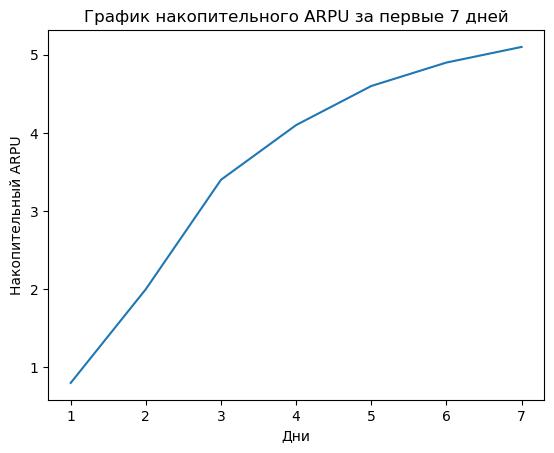

In [2]:
import matplotlib.pyplot as plt

# Значения накопительного ARPU
arpu = [0.8, 2, 3.4, 4.1, 4.6, 4.9, 5.1]

# Построение графика
plt.plot(range(1, len(arpu)+1), arpu)
plt.xlabel('Дни')
plt.ylabel('Накопительный ARPU')
plt.title('График накопительного ARPU за первые 7 дней')
plt.show()


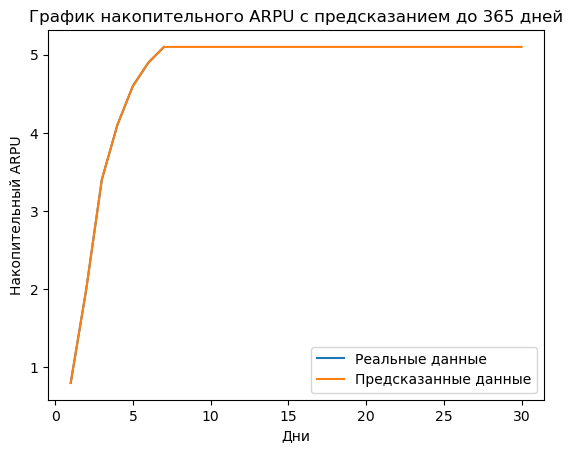

In [8]:
import matplotlib.pyplot as plt

# Значения накопительного ARPU
arpu = [0.8, 2, 3.4, 4.1, 4.6, 4.9, 5.1]

# Предсказание накопительного ARPU на 365 дней
predicted_arpu = arpu.copy()
k = 0.05
for n in range(len(arpu), 30):
    predicted_arpu.append(predicted_arpu[n-1] + (arpu[-1] - predicted_arpu[n-1]))

# Построение графика
plt.plot(range(1, len(arpu)+1), arpu, label='Реальные данные')
plt.plot(range(1, 31), predicted_arpu, label='Предсказанные данные')
plt.xlabel('Дни')
plt.ylabel('Накопительный ARPU')
plt.title('График накопительного ARPU с предсказанием до 365 дней')
plt.legend()
plt.show()

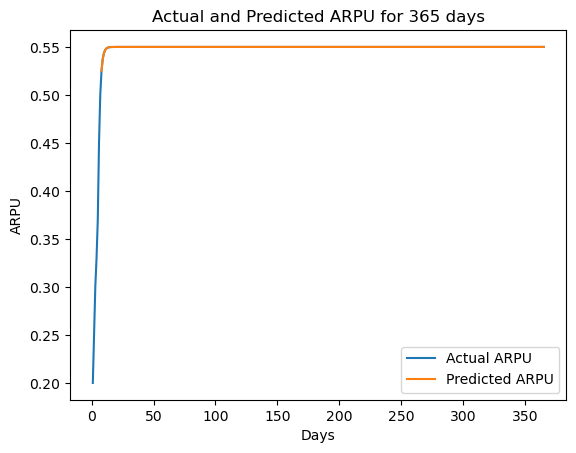

In [10]:
import matplotlib.pyplot as plt

arpu = [0.2, 0.25, 0.3, 0.33, 0.37, 0.45, 0.5]
predicted_arpu = []

for i in range(7, 365):
    arpu_n = arpu[-1] + ((arpu[-1] - arpu[-2]) / 2)
    predicted_arpu.append(arpu_n)
    arpu.append(arpu_n)

plt.plot(range(1, len(arpu)+1), arpu, label='Actual ARPU')
plt.plot(range(8, len(predicted_arpu)+8), predicted_arpu, label='Predicted ARPU')
plt.xlabel('Days')
plt.ylabel('ARPU')
plt.title('Actual and Predicted ARPU for 365 days')
plt.legend()
plt.show()

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Создаем DataFrame с данными
data = {'Day': [1, 3, 7, 14, 28],
        'Cumulative_ARPU': [0.022, 0.033, 0.047, 0.055, 0.061]}
df = pd.DataFrame(data)

# Разделяем данные на признаки и целевую переменную
X = df[['Day']]
y = df['Cumulative_ARPU']

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X, y)

# Предсказываем накопительный ARPU для новых данных
new_data = {'Day': [30, 60, 90]}
new_X = pd.DataFrame(new_data)
predicted_ARPU = model.predict(new_X)

# Выводим предсказанный накопительный ARPU
print(predicted_ARPU)

[0.06869153 0.10749288 0.14629422]


Optimal values of A and B: 0.0189748764262066 2.519577283806985


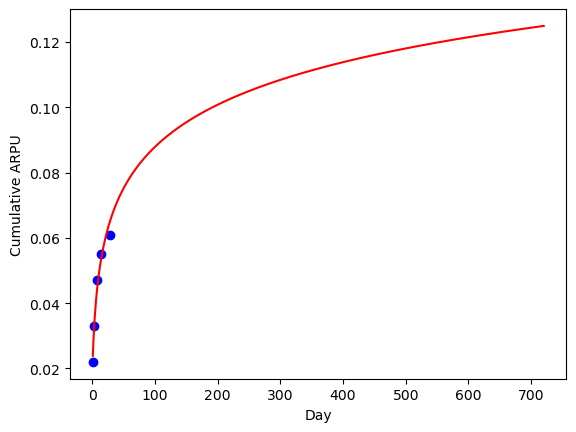

In [17]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Создаем DataFrame с данными
data = {'Day': [1, 3, 7, 14, 28],
        'Cumulative_ARPU': [0.022, 0.033, 0.047, 0.055, 0.061]}
df = pd.DataFrame(data)

# Определяем функцию для расчета суммы квадратов отклонений
def squared_error(params, x, y):
    A, B = params
    y_pred = A * np.log(B + x)
    return np.sum((y_pred - y) ** 2)

# Определяем начальные значения коэффициентов A и B
params0 = [1, 1]

# Минимизируем функцию squared_error для определения оптимальных значений коэффициентов A и B
res = minimize(squared_error, params0, args=(df['Day'], df['Cumulative_ARPU']))

# Получаем оптимальные значения коэффициентов A и B
A, B = res.x

# Создаем новые данные для построения графика
new_data = {'Day': np.arange(1, 721)}
new_X = pd.DataFrame(new_data)
predicted_ARPU = A * np.log(B + new_X['Day'])

# Выводим оптимальные значения коэффициентов A и B
print('Optimal values of A and B:', A, B)

# Строим график накопительного ARPU
plt.scatter(df['Day'], df['Cumulative_ARPU'], color='blue')
plt.plot(new_X['Day'], predicted_ARPU, color='red')
plt.xlabel('Day')
plt.ylabel('Cumulative ARPU')
plt.show()

Optimal values of A, B, C and D: 0.0096386945591516 1.2264668792505238 0.031099955968664807 0.8448775766535215


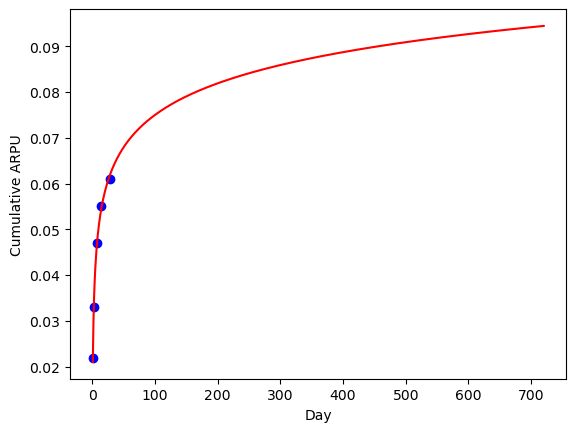

In [18]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Создаем DataFrame с данными
data = {'Day': [1, 3, 7, 14, 28],
        'Cumulative_ARPU': [0.022, 0.033, 0.047, 0.055, 0.061]}
df = pd.DataFrame(data)

# Определяем функцию для расчета суммы квадратов отклонений
def squared_error(params, x, y):
    A, B, C, D = params
    y_pred = (A * x * np.log(x + B) + C * x) / (x + D)
    return np.sum((y_pred - y) ** 2)

# Определяем начальные значения коэффициентов A, B, C и D
params0 = [1, 1, 1, 1]

# Минимизируем функцию squared_error для определения оптимальных значений коэффициентов A, B, C и D
res = minimize(squared_error, params0, args=(df['Day'], df['Cumulative_ARPU']))

# Получаем оптимальные значения коэффициентов A, B, C и D
A, B, C, D = res.x

# Создаем новые данные для построения графика
new_data = {'Day': np.arange(1, 721)}
new_X = pd.DataFrame(new_data)
predicted_ARPU = (A * new_X['Day'] * np.log(new_X['Day'] + B) + C * new_X['Day']) / (new_X['Day'] + D)

# Выводим оптимальные значения коэффициентов A, B, C и D
print('Optimal values of A, B, C and D:', A, B, C, D)

# Строим график накопительного ARPU
plt.scatter(df['Day'], df['Cumulative_ARPU'], color='blue')
plt.plot(new_X['Day'], predicted_ARPU, color='red')
plt.xlabel('Day')
plt.ylabel('Cumulative ARPU')
plt.show()

t = 112.90451384065395


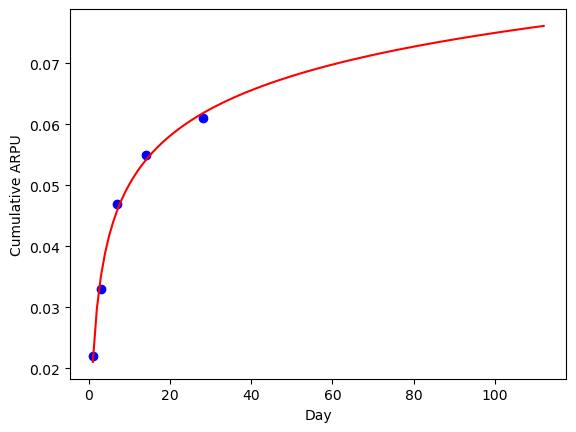

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Создаем DataFrame с данными
data = {'Day': [1, 3, 7, 14, 28],
        'Cumulative_ARPU': [0.022, 0.033, 0.047, 0.055, 0.061]}
df = pd.DataFrame(data)

# Определяем функцию для расчета значения F(t)
def F(t, A, B, C, D):
    return (A * t * np.log(t + B) + C * t) / (t + D)

# Определяем начальные значения коэффициентов A, B, C и D
params0 = [1, 1, 1, 1]

# Минимизируем функцию squared_error для определения оптимальных значений коэффициентов A, B, C и D
res = minimize(squared_error, params0, args=(df['Day'], df['Cumulative_ARPU']))

# Получаем оптимальные значения коэффициентов A, B, C и D
A, B, C, D = res.x

# Определяем целевой уровень выручки, ставку дисконтирования и начальный уровень выручки
target_revenue = 1000000
discount_rate = 0.15
initial_revenue = F(1, A, B, C, D)

# Рассчитываем t с помощью метода дисконтированного наращения выручки
t = np.log((target_revenue / initial_revenue - 1) * discount_rate + 1) / np.log(1 + discount_rate)

# Выводим результат
print('t =', t)

# Строим график накопительного ARPU
new_data = {'Day': np.arange(1, int(t) + 1)}
new_X = pd.DataFrame(new_data)
predicted_ARPU = F(new_X['Day'], A, B, C, D)
plt.scatter(df['Day'], df['Cumulative_ARPU'], color='blue')
plt.plot(new_X['Day'], predicted_ARPU, color='red')
plt.xlabel('Day')
plt.ylabel('Cumulative ARPU')
plt.show()


t = 161.30794371471677


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

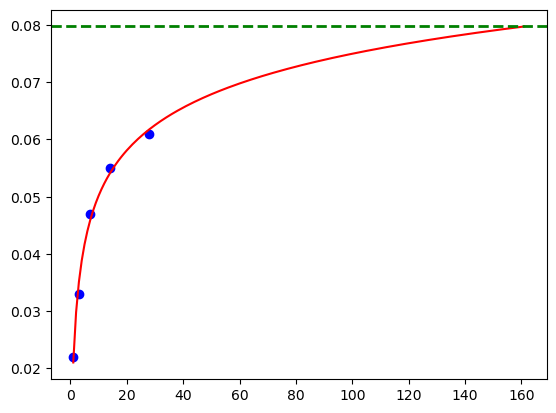

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Создаем DataFrame с данными
data = {'Day': [1, 3, 7, 14, 28],
        'Cumulative_ARPU': [0.022, 0.033, 0.047, 0.055, 0.061]}
df = pd.DataFrame(data)

# Определяем функцию для расчета значения F(t)
def F(t, A, B, C, D):
    return (A * t * np.log(t + B) + C * t) / (t + D)

# Определяем начальные значения коэффициентов A, B, C и D
params0 = [1, 1, 1, 1]

# Минимизируем функцию squared_error для определения оптимальных значений коэффициентов A, B, C и D
res = minimize(squared_error, params0, args=(df['Day'], df['Cumulative_ARPU']))

# Получаем оптимальные значения коэффициентов A, B, C и D
A, B, C, D = res.x

# Определяем целевой уровень выручки, ставку дисконтирования и начальный уровень выручки
target_revenue = 1000000
discount_rate = 0.1
initial_revenue = F(1, A, B, C, D)

# Рассчитываем t с помощью метода дисконтированного наращения выручки
t = np.log((target_revenue / initial_revenue - 1) * discount_rate + 1) / np.log(1 + discount_rate)

# Выводим результат
print('t =', t)

# Строим график накопительного ARPU
new_data = {'Day': np.arange(1, int(t) + 1)}
new_X = pd.DataFrame(new_data)
predicted_ARPU = F(new_X['Day'], A, B, C, D)
plt.scatter(df['Day'], df['Cumulative_ARPU'], color='blue')
plt.plot(new_X['Day'], predicted_ARPU, color='red')
plt.axhline(y=F(t, A, B, C, D), linestyle='--', linewidth=2, color='green')
plt.xlabel

t = 161.30794371471677


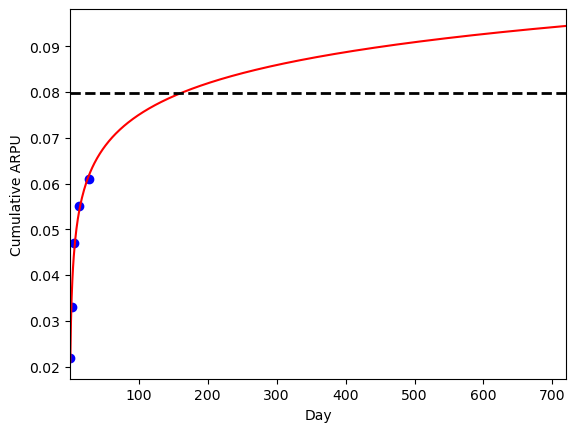

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Создаем DataFrame с данными
data = {'Day': [1, 3, 7, 14, 28],
        'Cumulative_ARPU': [0.022, 0.033, 0.047, 0.055, 0.061]}
df = pd.DataFrame(data)

# Определяем функцию для расчета значения F(t)
def F(t, A, B, C, D):
    return (A * t * np.log(t + B) + C * t) / (t + D)

# Определяем начальные значения коэффициентов A, B, C и D
params0 = [1, 1, 1, 1]

# Минимизируем функцию squared_error для определения оптимальных значений коэффициентов A, B, C и D
res = minimize(squared_error, params0, args=(df['Day'], df['Cumulative_ARPU']))

# Получаем оптимальные значения коэффициентов A, B, C и D
A, B, C, D = res.x

# Определяем целевой уровень выручки, ставку дисконтирования и начальный уровень выручки
target_revenue = 1000000
discount_rate = 0.1
initial_revenue = F(1, A, B, C, D)

# Рассчитываем t с помощью метода дисконтированного наращения выручки
t = np.log((target_revenue / initial_revenue - 1) * discount_rate + 1) / np.log(1 + discount_rate)

# Выводим результат
print('t =', t)

# Строим график накопительного ARPU
new_data = {'Day': np.arange(1, 721)}
new_X = pd.DataFrame(new_data)
predicted_ARPU = F(new_X['Day'], A, B, C, D)
plt.scatter(df['Day'], df['Cumulative_ARPU'], color='blue')
plt.plot(new_X['Day'], predicted_ARPU, color='red')
plt.axhline(y=F(t, A, B, C, D), linestyle='--', linewidth=2, color='black')
plt.xlabel('Day')
plt.ylabel('Cumulative ARPU')
plt.xlim([1, 720])
plt.show()

Предсказание LTV c помощью Cumulative ARPU и ставки дисконтирования 0.15
Optimal time = 113 days
LTV =  0.076


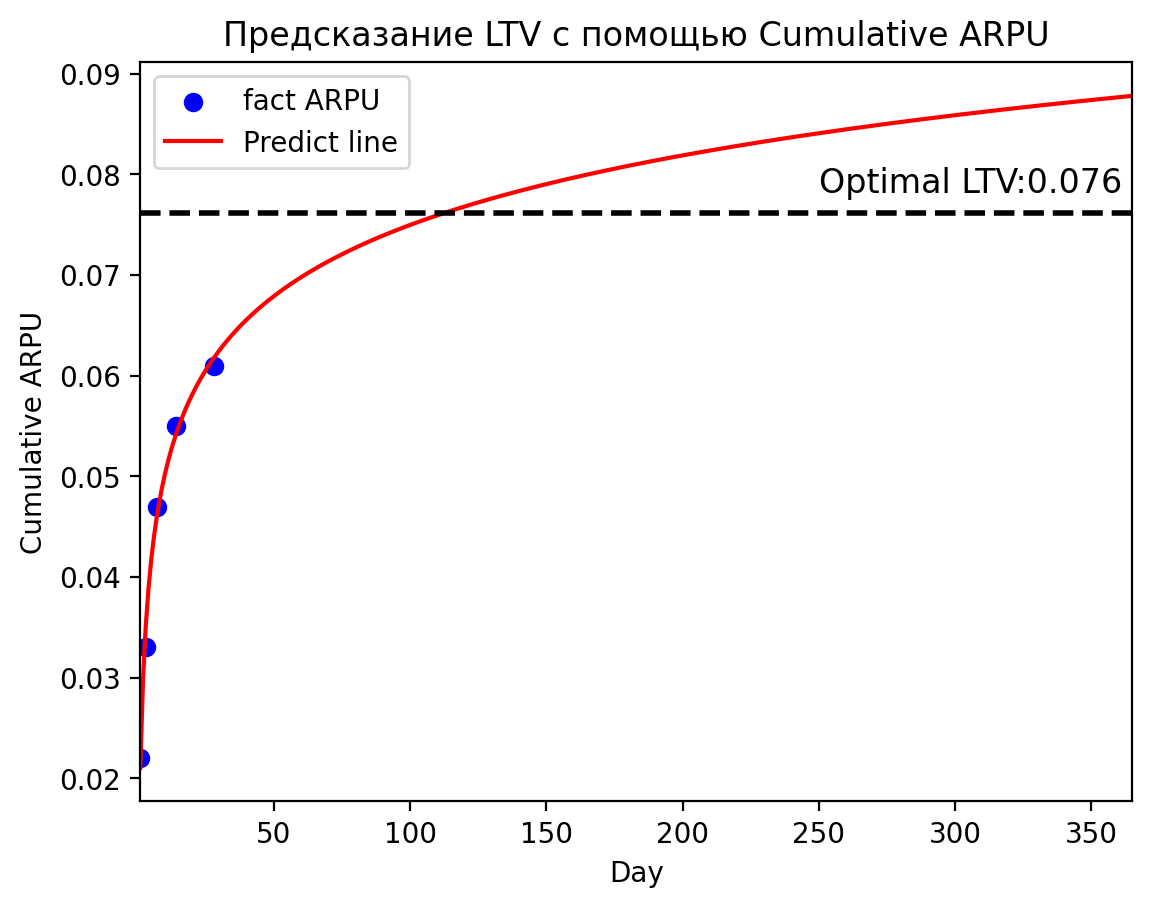

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%config InlineBackend.figure_format = 'retina'
plt.style.available

# Создаем DataFrame с данными
data = {'Day': [1, 3, 7, 14, 28],
        'Cumulative_ARPU': [0.022, 0.033, 0.047, 0.055, 0.061]}
df = pd.DataFrame(data)

# Определяем функцию для расчета значения F(t)
def F(t, A, B, C, D):
    return (A * t * np.log(t + B) + C * t) / (t + D)

# Определяем начальные значения коэффициентов A, B, C и D
params0 = [1, 1, 1, 1]

# Минимизируем функцию squared_error для определения оптимальных значений коэффициентов A, B, C и D
res = minimize(squared_error, params0, args=(df['Day'], df['Cumulative_ARPU']))

# Получаем оптимальные значения коэффициентов A, B, C и D
A, B, C, D = res.x

# Определяем целевой уровень выручки, ставку дисконтирования и начальный уровень выручки
target_revenue = 1000000
discount_rate = 0.15
initial_revenue = F(1, A, B, C, D)

# Рассчитываем t с помощью метода дисконтированного наращения выручки
t = np.log((target_revenue / initial_revenue - 1) * discount_rate + 1) / np.log(1 + discount_rate)

# Выводим результат
print('Предсказание LTV c помощью Cumulative ARPU и ставки дисконтирования', discount_rate)
print('Optimal time =', round(t),'days')
print('LTV = ', round(F(t, A, B, C, D),3))

# Строим график накопительного ARPU
new_data = {'Day': np.arange(1, 366)}
new_X = pd.DataFrame(new_data)
predicted_ARPU = F(new_X['Day'], A, B, C, D)
plt.scatter(df['Day'], df['Cumulative_ARPU'], color='blue')
plt.plot(new_X['Day'], predicted_ARPU, color='red')
plt.axhline(y=F(t, A, B, C, D), linestyle='--', linewidth=2, color='black')
plt.text(250, F(t, A, B, C, D) + 0.002, f'Optimal LTV:{round(F(t, A, B, C, D),3)}', fontsize=12, color='black')
plt.title('Предсказание LTV c помощью Cumulative ARPU')
plt.legend([ 'fact ARPU' , 'Predict line'])
plt.xlabel('Day')
plt.ylabel('Cumulative ARPU')
plt.xlim([1, 365])
plt.show()

## Итоги

- Провёл обзор данных.
- Удалил дубликаты.
- Заполнил пропуски.
- Обработал дату релиза.
- Перевёл численные значения из строкового формата *K (тыс.) в целочисленный формат *000. (К примеру, было 18.5K, стало 18500)
- Так как одна и та же игра может относиться к нескольким жанрам или командам разработчиков, то я выделил ещё два датасета "teams.csv" и "genres.csv".

Данные готовы к визуализации, которую буду делать в Yandex DataLens.